# KNN Model

## Import Packages

## Import Data

In [2]:
# Import train data
train_data_url = 'https://raw.githubusercontent.com/cal-dortiz/W207_Applied-_Machine_Learning/main/Final_Project/Data/train.csv'
df_train = pd.read_csv(train_data_url)

 ### Process Data for KNN

In [3]:
# Check missing data
df_train.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [4]:
# Remove "Junk" columns
df_train = df_train.drop(columns=['Id','LotFrontage', 'MiscFeature'])

# Drop the row with the missing electrical data
df_train = df_train.dropna( how='any', subset=['Electrical'])

#### Transform Data Types

There are three groups of data in the data set; Numerical, Ordinal, and Catagorical. We need to process each data type uniqly. We will scale the numerical data to mitigate any concern the attributes scale will have on the model. We will encode ordinal data in a scale ranging 0-5, preserving the catagories relations. We will ue dummy variables for the catagorical data.

In [5]:
# Log Transform (y) - Housign Sale Price
df_train['SalePrice'] = np.log(df_train['SalePrice'])

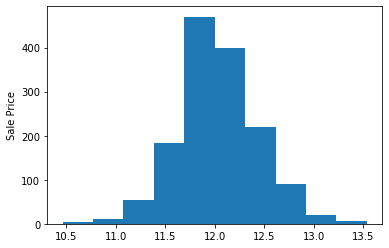

In [6]:
plt.hist(df_train['SalePrice'])
plt.ylabel('Sale Price')
plt.show()

In [7]:
#Describe numerical variables
NumDataSet = df_train.select_dtypes(exclude='O')


#Describe categorical variables
CatDataSet = df_train.select_dtypes(include='O')
Categorical_Cols = CatDataSet.columns.tolist()
Categorical_Cols

Numerical_Cols = NumDataSet.columns.tolist()
Numerical_Cols 


#Within categorical variables, there are several categories that are not 
#purely nominal/unordered but insteted are ordered categories - In other
#words, they are ordinal but have text values, not numerical values. We separate
#these into a new category

Ordered_Category = CatDataSet[['ExterQual','ExterCond','BsmtQual','BsmtCond',
                   'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']].copy()

    
#Remove these columns from the categorical dataset, which will now include only
#unordered categories
CatDataSet = CatDataSet.drop(['ExterQual','ExterCond','BsmtQual','BsmtCond', 'HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond'], axis = 'columns')


#4.2.2 Convert all cateogrical values to numeric values
#For ordered category data, use the ordinal encoder from sklearn.
#Given a dataset with unique features, we let the encoder find the unique values per feature and transform the data to an ordinal encoding.
Ordered_Category['ExterQual'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['ExterCond'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['BsmtQual'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['BsmtCond'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['HeatingQC'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['KitchenQual'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['FireplaceQu'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['GarageQual'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
Ordered_Category['GarageCond'].replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po', np.nan], value=[5, 4, 3, 2, 1, 0], inplace=True)
NumDataSet['GarageYrBlt'].replace(to_replace=[np.nan], value=[0], inplace=True)
NumDataSet['MasVnrArea'].replace(to_replace=[np.nan], value=[0], inplace=True)

/Users/danielortiz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [8]:
# Encode Catagorical data

le = preprocessing.LabelEncoder()

#For categorical data, use LabelEncoder to categorize the variables.
for col in CatDataSet:
    i = CatDataSet.columns.get_loc(col)
    CatDataSet.iloc[:,i] = CatDataSet.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

# glue data sets together
df_train2 = pd.concat((CatDataSet, Ordered_Category, NumDataSet), axis=1, join='inner')

#### Verify data has been cleaned

In [9]:
#See if there are any nulls left.
df_train2.isnull().sum().sort_values(ascending = False).head(20)

SalePrice        0
PavedDrive       0
BsmtFinType2     0
Heating          0
CentralAir       0
Electrical       0
Functional       0
GarageType       0
GarageFinish     0
PoolQC           0
BsmtExposure     0
Fence            0
SaleType         0
SaleCondition    0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtFinType1     0
Foundation       0
dtype: int64

## Break training data into training and test

In [10]:
lab_enc = preprocessing.LabelEncoder()
df_train2['SalePrice'] = lab_enc.fit_transform(df_train['SalePrice'])

use_cols=list(df_train2.columns)
use_cols.remove('SalePrice')

x_train, x_test, y_train, y_test = train_test_split(df_train2[use_cols],df_train2['SalePrice'], 
                                                    test_size = 0.25, random_state = 2)

In [11]:
x_train.shape, x_test.shape

((1094, 77), (365, 77))

In [12]:
print(y_test)

1354    466
101     323
1325      7
1088    182
476     413
       ... 
215     167
1452    212
1175    554
80      374
37      239
Name: SalePrice, Length: 365, dtype: int64


### KNN Model

In [13]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [14]:
k_values = range(1,len(x_train[0]))

In [15]:
rmse = []

for index in k_values:

    #Initiate KNN Classifier and set the number of neighbors to the K_value
    #array
    nn = KNeighborsClassifier(n_neighbors = index)
    
    # Fit KNN Model
    nn.fit(x_train, y_train)
    
    # Predict Lable
    y_predict = nn.predict(x_test)
    
    # Calculate RMSE
    rmse.append(mean_squared_error(np.log(lab_enc.inverse_transform(y_test)), np.log(lab_enc.inverse_transform(y_predict))))

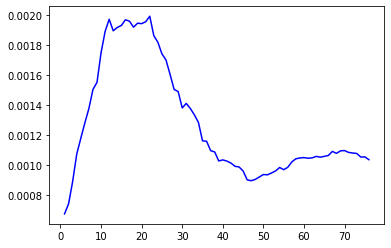

In [16]:
plt.plot(k_values, rmse, 'blue')
#plt.

In [17]:
rmse_min = min(rmse)
print(rmse_min)
print(rmse.index(rmse_min))

0.000677112817671772
0
